In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('credit_DataPrep.csv', sep=';')
df.head(15)

,Gender,Married,Dependents,Education,Employed,ApplicantIncome,Property_Area,Credit_History,Loan_Status
0,0,0,0,0,0,8.674026,0,1.0,0
1,0,1,1,0,0,8.430109,1,1.0,1
2,0,1,0,0,1,8.006368,0,1.0,0
3,0,1,0,1,0,7.856707,0,1.0,0
4,0,0,0,0,0,8.699515,0,1.0,0
5,0,1,2,0,1,8.597297,0,1.0,0
6,0,1,0,1,0,7.754910,0,1.0,0
7,0,1,3,0,0,8.018296,2,0.0,1
8,0,1,2,0,0,8.295549,0,1.0,0
9,0,1,1,0,0,9.460398,2,1.0,1


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)

In [4]:
X = df[:, [0,1,2,3,7,8 ]]

In [23]:
#! pip install simpsom

In [15]:
import simpsom as sps
net = sps.SOMNet(15, 20,  X, PBC=True, random_seed=8)
net.train(train_algo='online', epochs=1000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialized with PCA.
The map will be trained with the online algorithm.
Training SOM... done!


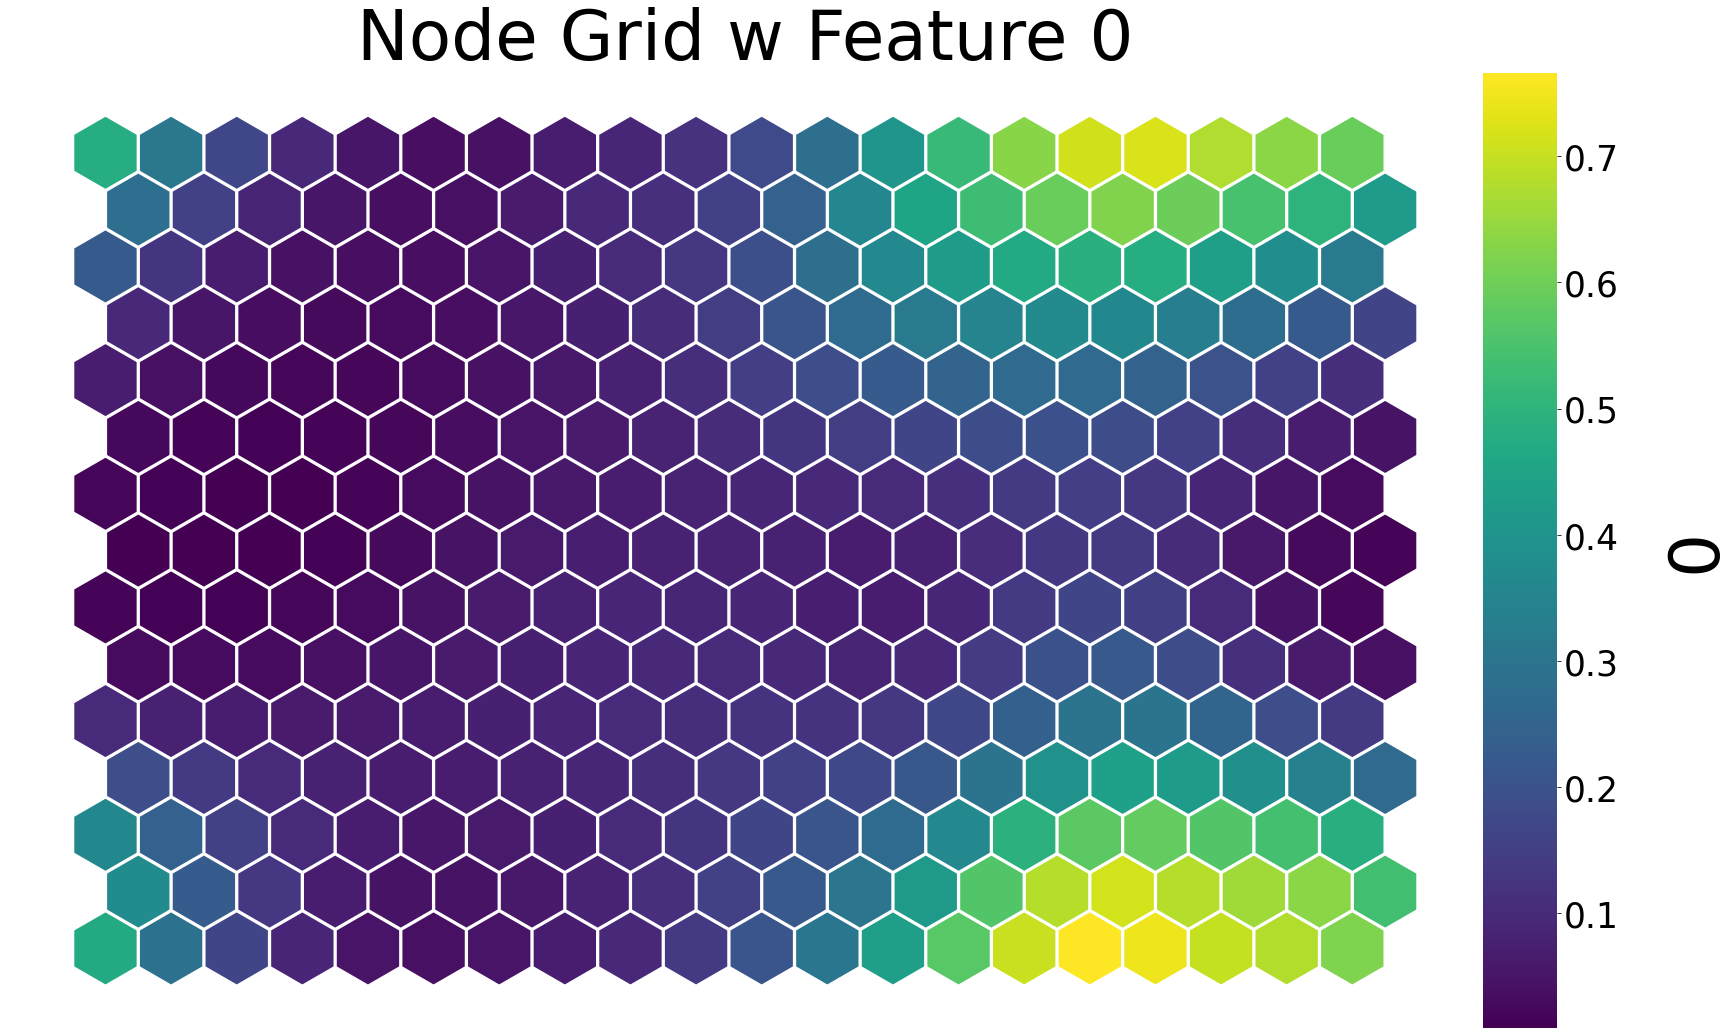

In [16]:
net.nodes_graph(colnum=0)

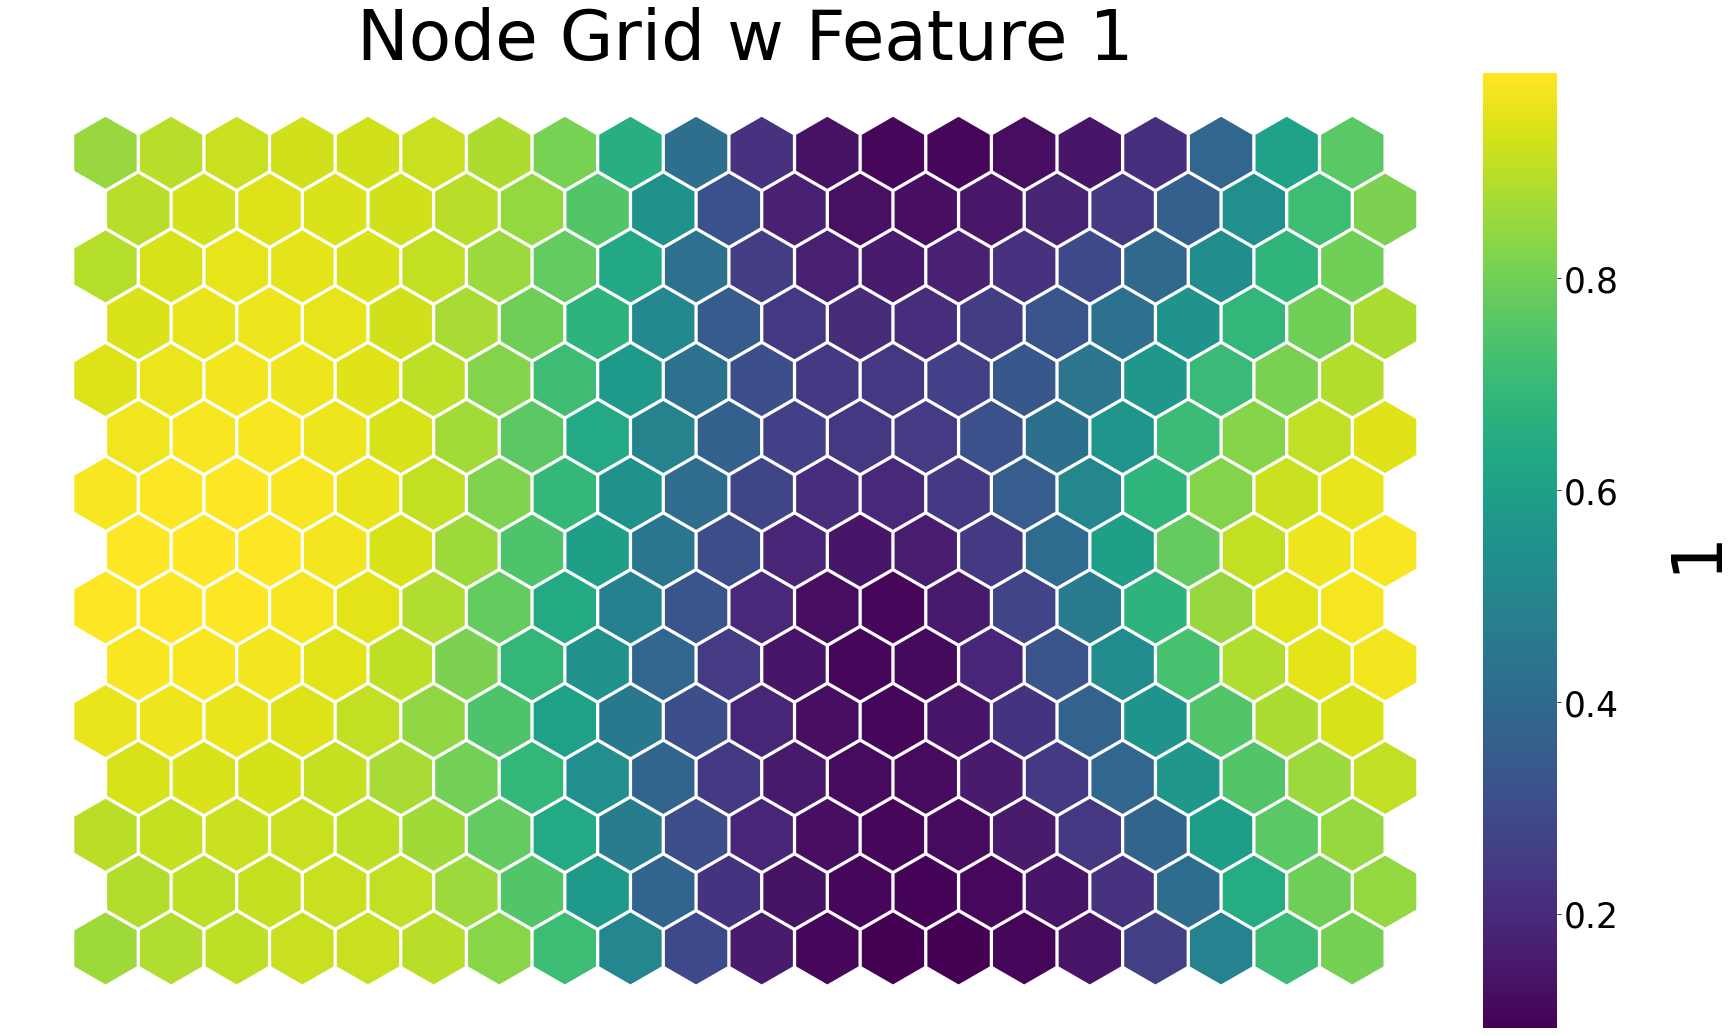

In [17]:
net.nodes_graph(colnum=1)

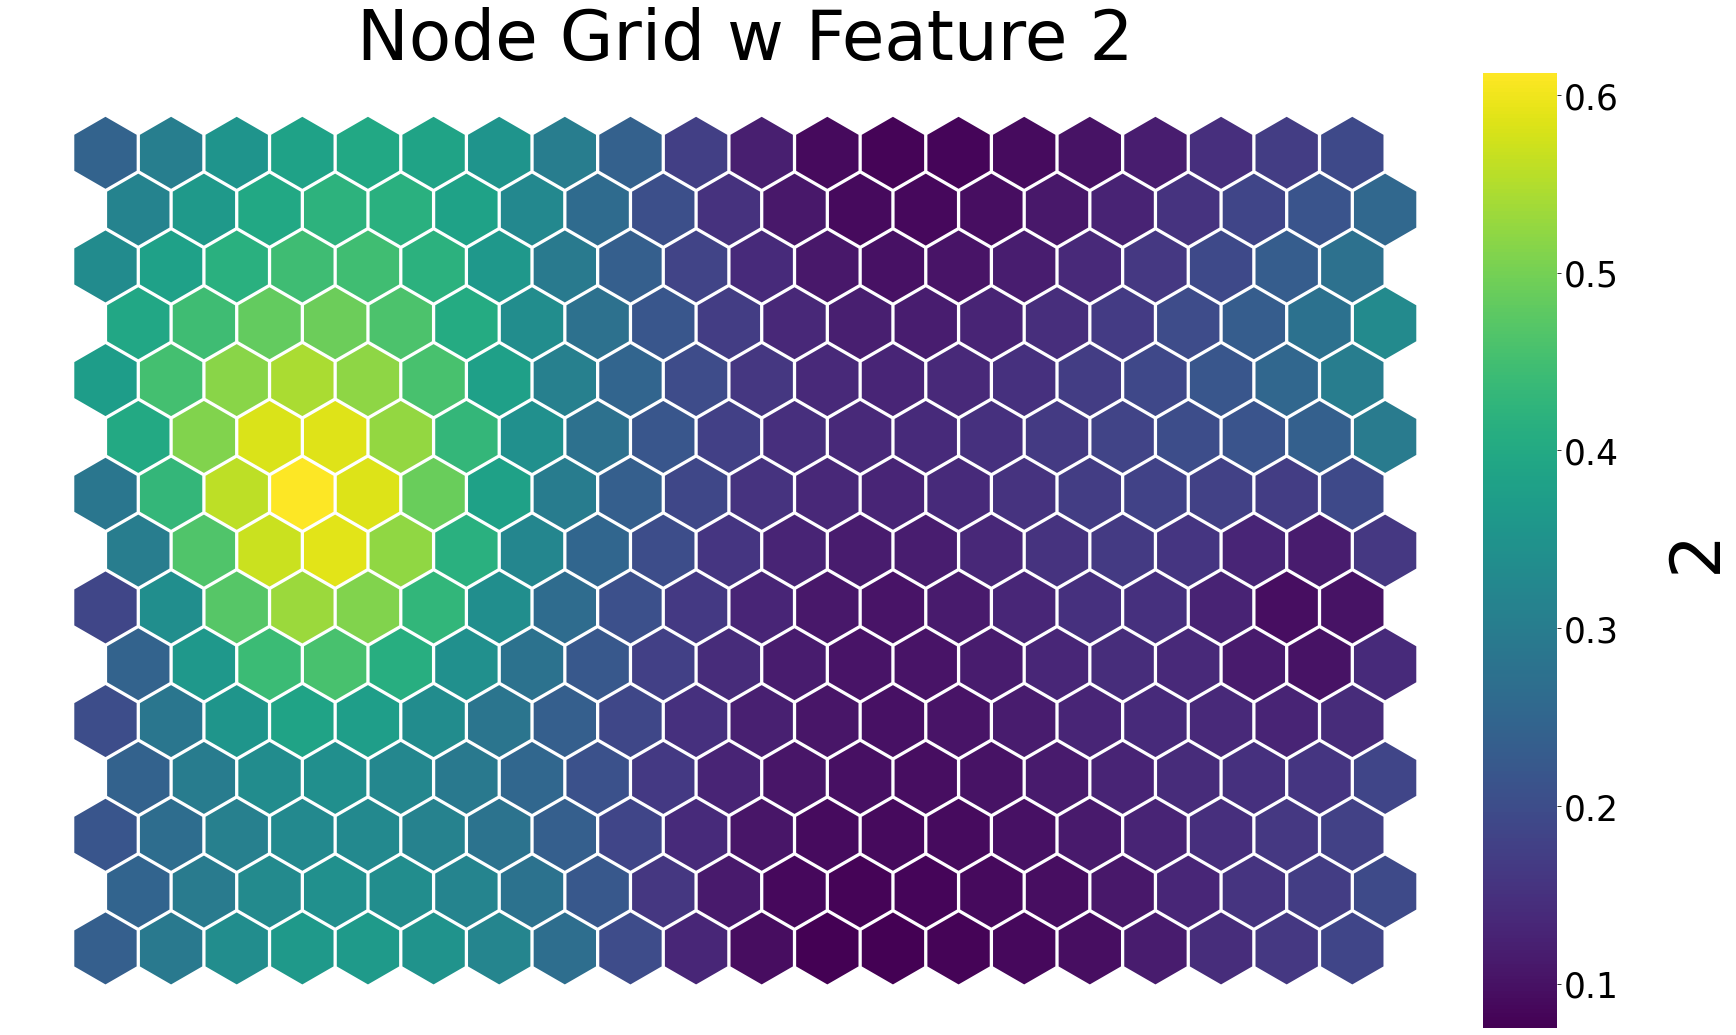

In [18]:
net.nodes_graph(colnum=2)

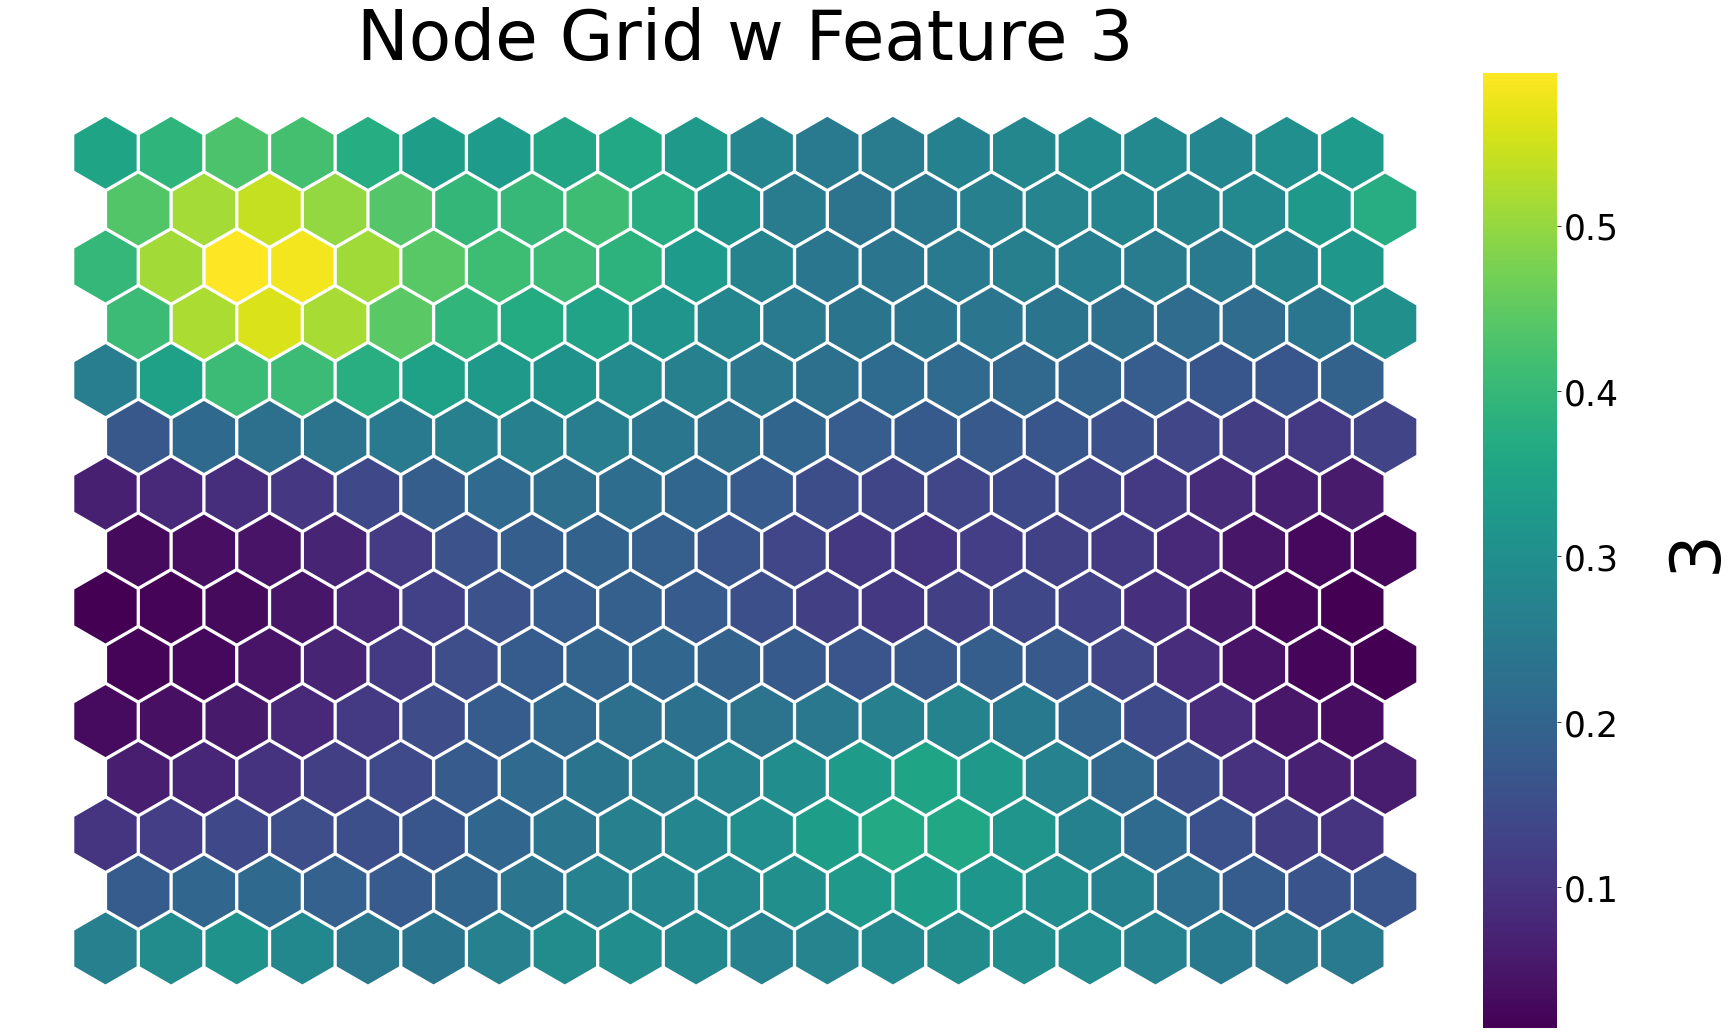

In [19]:
net.nodes_graph(colnum=3)

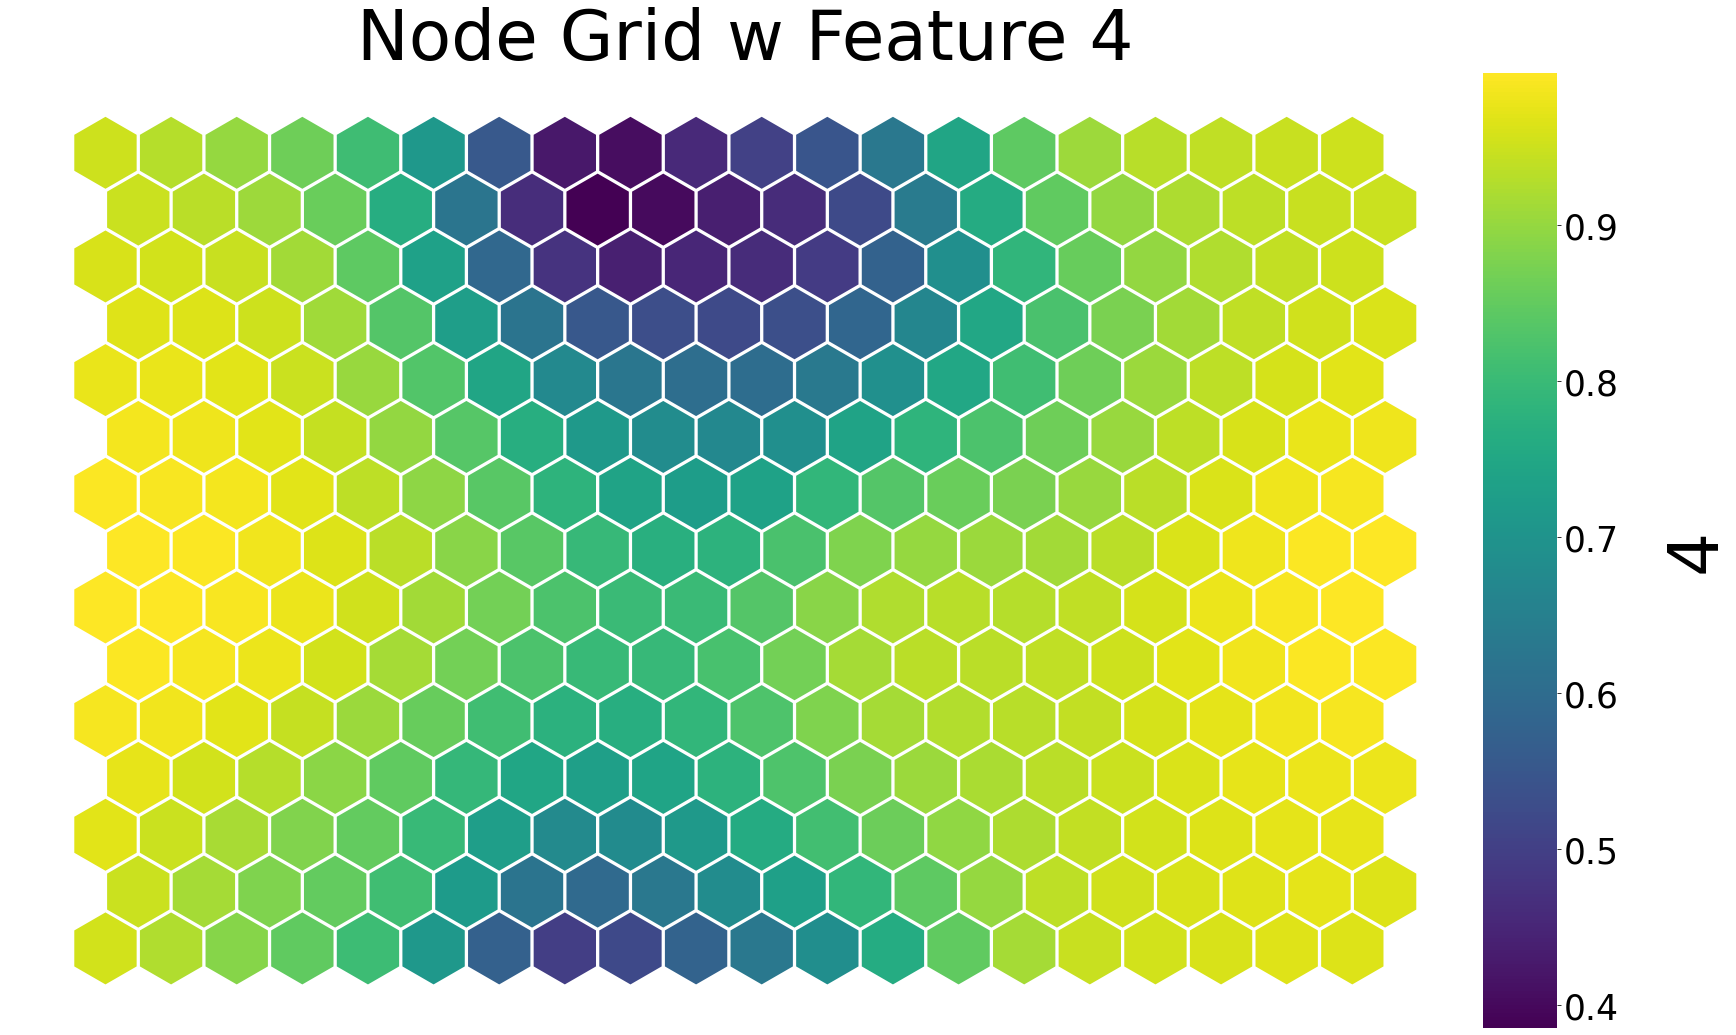

In [20]:
net.nodes_graph(colnum=4)

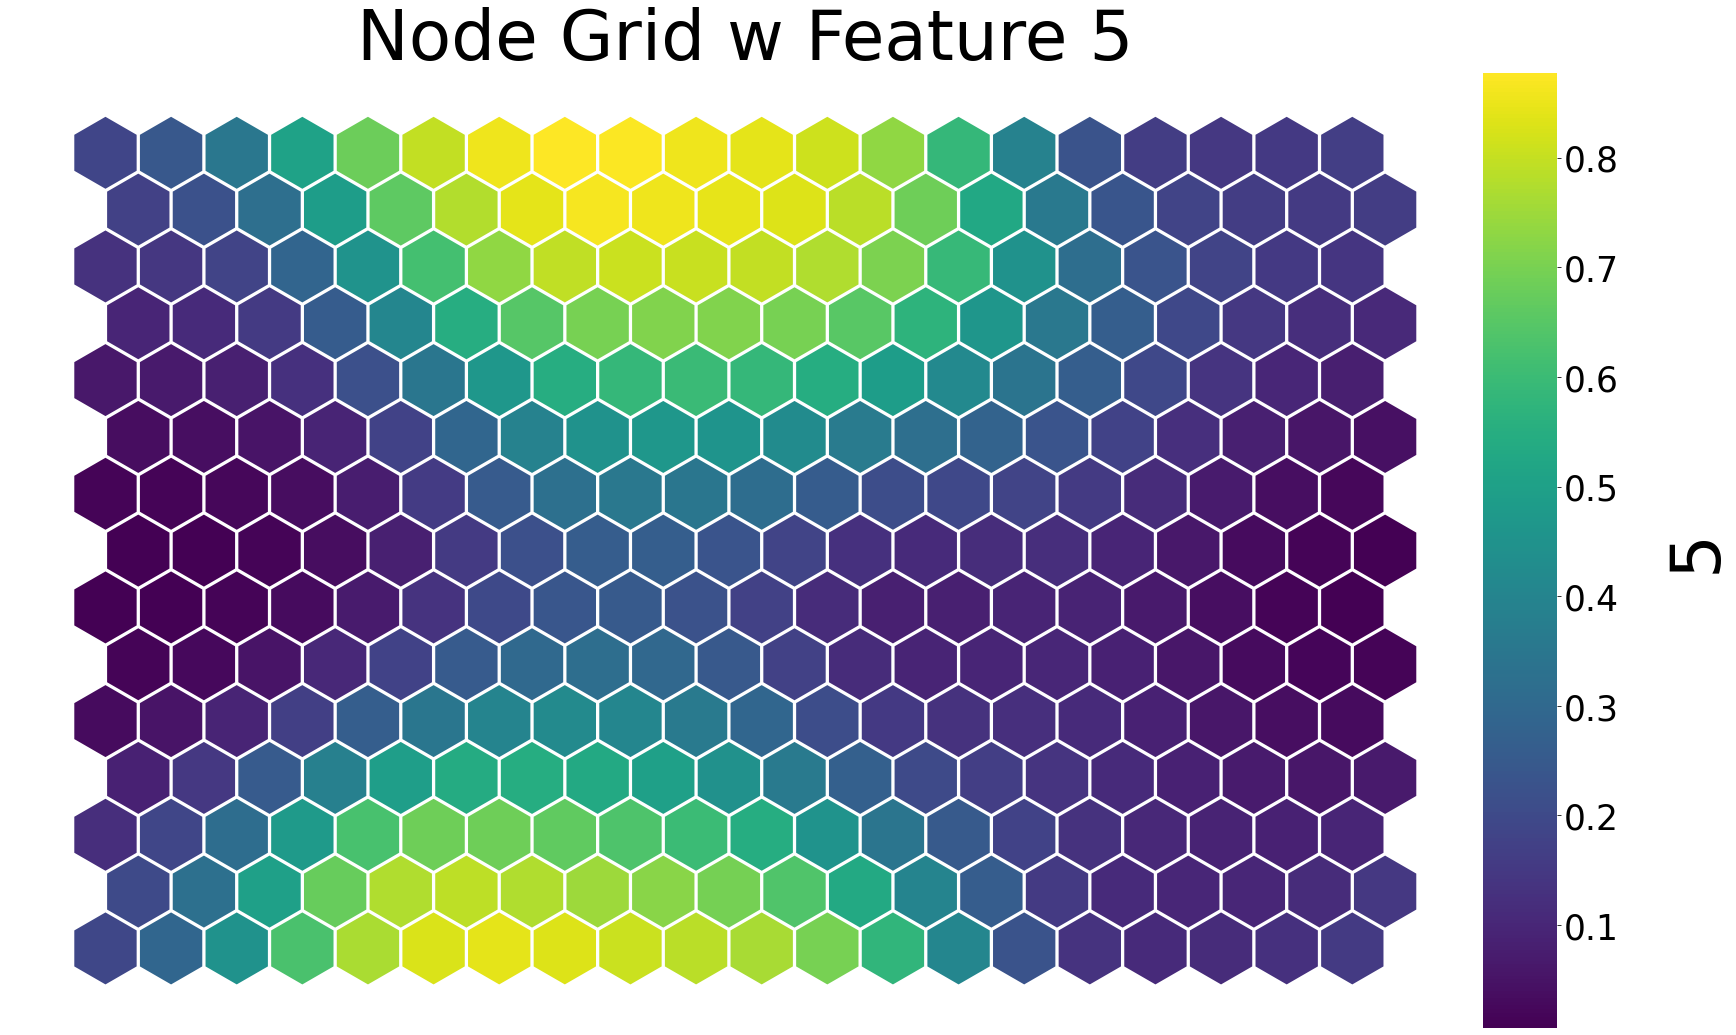

In [21]:
net.nodes_graph(colnum=5)

Карты Кохонена помогают понять как по каждому фактору распределились заемщики. Используя соответсвующие ячейки можно предположить о том, какими данными владеет тот или иной клиент. Так, например, возьмем крайние правые точки. Исходя из последней карты - здесь находятся люди, которые не имеют сторонних кредитов. Кредитная история на хорошем уровне. Вероятнее, имеют высшее образование. Никого не содержат, Скорей всего в браке и являются мужчинами.

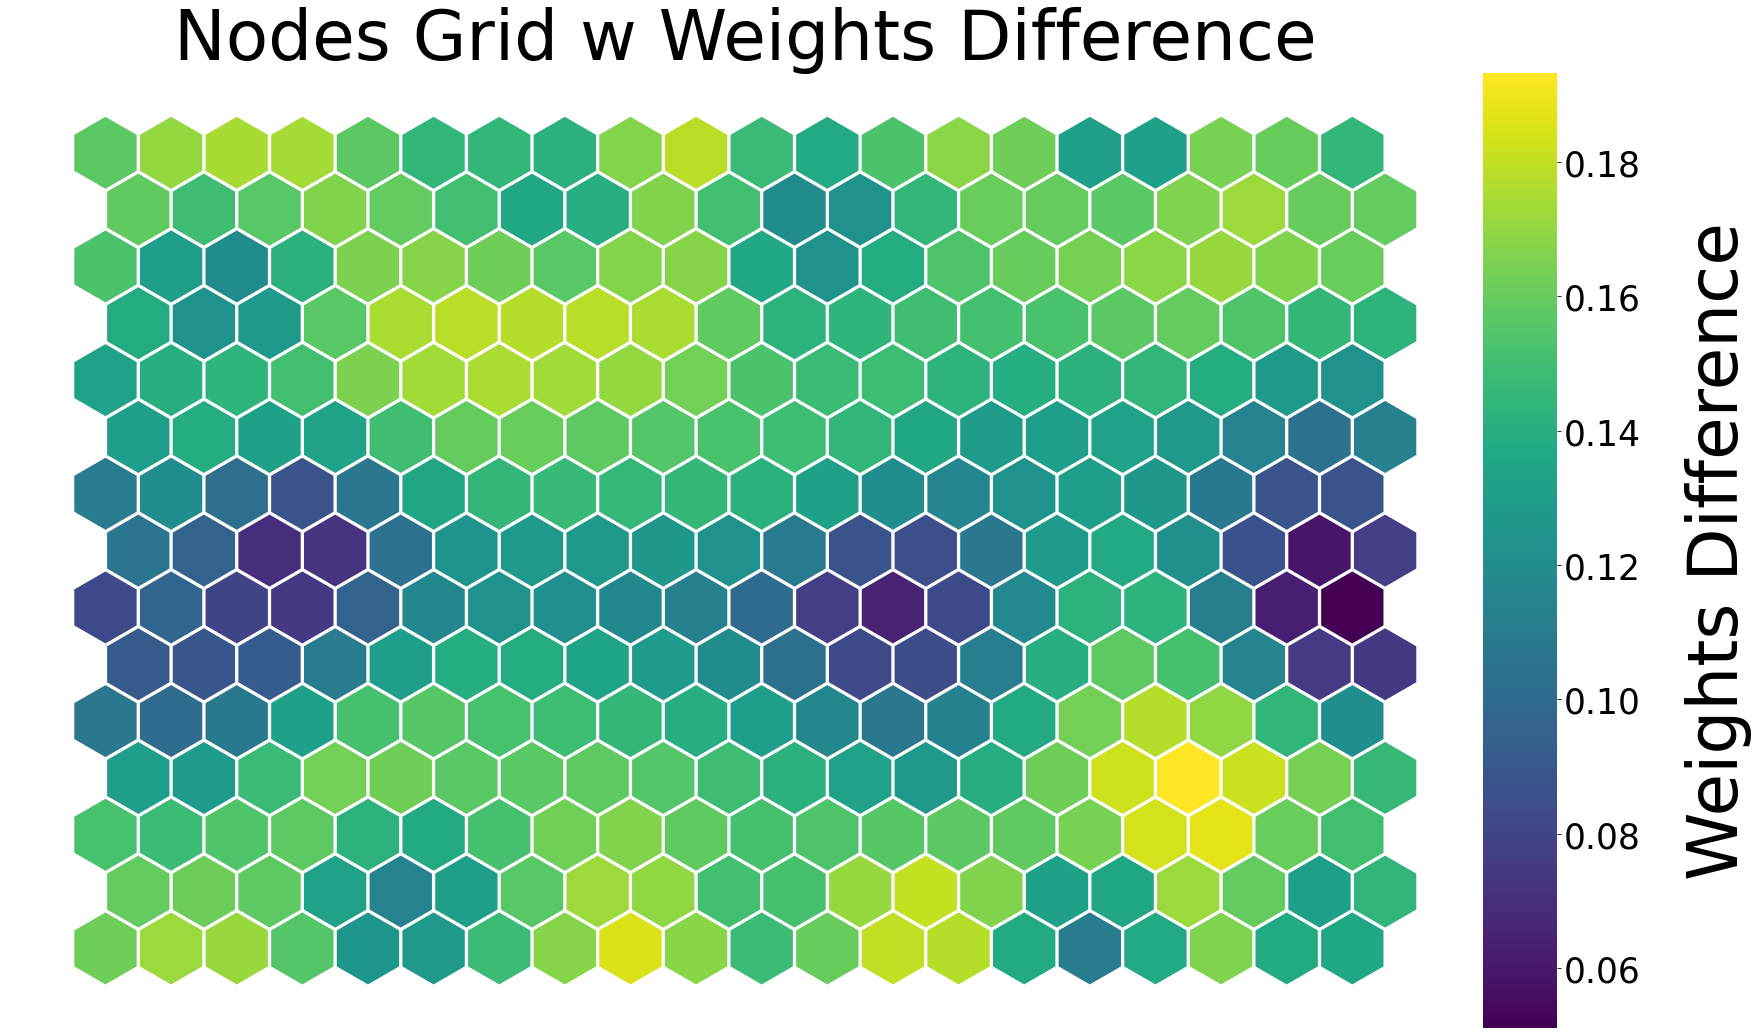

In [22]:
net.diff_graph()

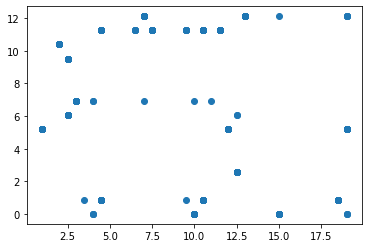

In [24]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

Сложно выделить точное количество кластеров, рассеянная структура данных.

In [25]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)

In [26]:
# Importing hc clusters
import pickle
input = open('clust-hc3_vk.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc3_vk = obj["hc3_vk"]

In [27]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc3_vk,kmeans.labels_)

0.216468832269076

In [29]:
# Importing km clusters
import pickle
input = open('clust-km3_vk.pkl', 'rb')
obj = pickle.load(input)
input.close()
km3_vk = obj["km3_vk"]

In [30]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km3_vk,kmeans.labels_)

0.30248127438274897

Совпадение с данным методом значительно хуже. Лучший результат - 30% для метода к-средних. Однако, по результатам всех исселодований приходим к выводу, что расделение на 3 кластера является самым оптимальным и интересным для изучения.

In [37]:
# Fitting K-Means to the dataset
km_r = KMeans(n_clusters = 3, random_state = 0).fit(df[X_vk])
km3_vk = km_r.predict(df[X_vk])
km3_vk_centers = pd.DataFrame(km_r.cluster_centers_, columns = ['Gender','Married','Dependents','Education','Credit_History','Loan_Status']).round(2)
km3_vk_centers

,Gender,Married,Dependents,Education,Credit_History,Loan_Status
0,0.39,0.00,0.09,0.18,0.98,0.23
1,0.08,1.00,0.33,0.19,0.99,-0.00
2,0.13,0.75,0.28,0.32,0.46,1.00


Кластер 0 - "Люди среднего заработка, которым вероятнее всего выдадут кредит"

В данный кластер попали: люди любого пола, не в браке, никого не содержащие, вероятнее всего с высшим образованием, с хорошей кредитной историей и вероятнее без сопутсвующих кредитов. 

У таких людей большой шанс получить кредит и быть хорошим банковским клиентом.

Кластер 1 - "Заможние люди, который точно выдадут кредит"

Это мужчины в браке, у которых есть иждивенцы (вероятнее всего денежный доход позволяет содержать других людей), могут быть не обязательно с высшим образованием, с отличной кредитной историей и без каких-то кредитов.


Кластер 2 - "Недобросовестные плательщики"

Вероятнее мужчины, скорей всего в браке, у которых есть иждивенцы, хотя, что интерсно - имеют вероятно высшее образование, с не очень хорошей кредитной историей и побочными кредитами. Вряд ли банк захочет выдавать кредит таким людям.

Таким образом, получена модель, которая помогает выделить среди населения добросовестных плательщиков и уменьщает банковские риски на невозврат средств по кредиту.


In [56]:
X = df.iloc[:, [0,1,2,3,7,8 ]]

In [59]:
X['kmean'].value_counts()

1    288
2    195
0    131
Name: kmean, dtype: int64

В результате видно, что выборка в целом сбалансирована. А наибольшее количество людей - добросовестные плательщики, которым точно выдадут кредит. Что являвется хорошей тенденцией для банка.